Shape of dataset: (569, 33)

Missing values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst          

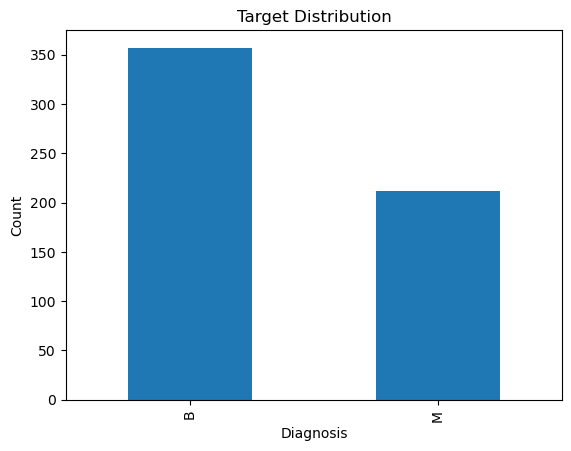

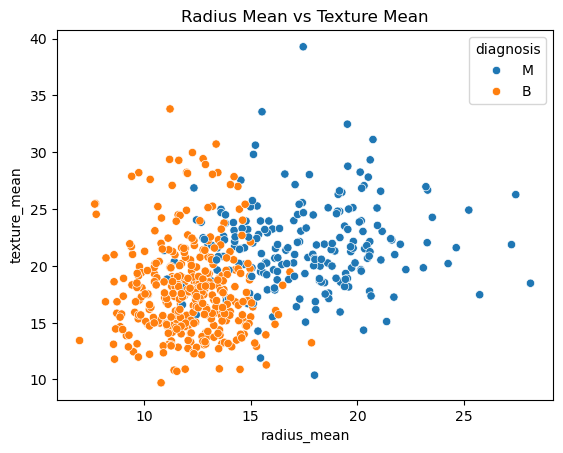

ROC-AUC Score: 0.996031746031746


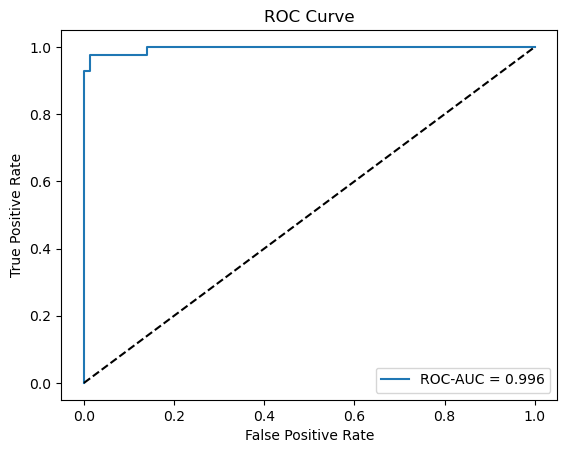


Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# 2. LOAD DATASET
df = pd.read_csv("data.csv")

# 3. MINIMUM EDA
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

print("\nTarget distribution:")
print(df["diagnosis"].value_counts())

# Plot 1: Target distribution
df["diagnosis"].value_counts().plot(kind="bar", title="Target Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# Plot 2: Feature relationship
sns.scatterplot(
    x="radius_mean",
    y="texture_mean",
    hue="diagnosis",
    data=df
)
plt.title("Radius Mean vs Texture Mean")
plt.show()

# 4. DATA CLEANING
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

# Encode target variable
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# 5. TRAIN / VALIDATION SPLIT
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 6. FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 7. LOGISTIC REGRESSION MODEL
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 8. PREDICTION & ROC-AUC
y_val_prob = model.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_prob)

print("ROC-AUC Score:", roc_auc)

# 9. ROC CURVE
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 10. CLASSIFICATION REPORT
y_val_pred = model.predict(X_val_scaled)
print("\nClassification Report:\n")
print(classification_report(y_val, y_val_pred))
